In [ ]:
!pip install torchsummary

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
from torchvision import datasets
from PIL import Image
from torchsummary import summary

In [ ]:
# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 20
#  validation sample
valid_sample = 0.2

transform = [transforms.Pad(2), transforms.ToTensor()]

# choose the training and test datasets
train_data = datasets.MNIST(root='data',
                            train=True,
                            download=True,
                            transform=transforms.Compose(transform))
test_data = datasets.MNIST(root='data',
                           train=False,
                           download=True,
                           transform=transforms.Compose(transform))

# Creating validation sampler
num_train = len(train_data)
indices = list(range(num_train))
np.random.shuffle(indices)
split = int(valid_sample * num_train)
train_idx, valid_idx = indices[split:], indices[:split]

# define sampler for batches
trainSampler = SubsetRandomSampler(train_idx)
validationSampler = SubsetRandomSampler(valid_idx)

# prepare data loaders
train_loader = DataLoader(train_data,
                          batch_size=batch_size,
                          sampler=trainSampler,
                          num_workers=num_workers)
validation_loader = DataLoader(train_data,
                               batch_size=batch_size,
                               sampler=validationSampler,
                               num_workers=num_workers)
test_loader = DataLoader(test_data,
                         batch_size=batch_size,
                         num_workers=num_workers)


In [ ]:
# for data in train_loader:
#     inputs, labels = data  # Extract inputs and labels

#     # Convert grayscale images (1 channel) to RGB images (3 channels)
#     train_inputs = torch.cat((inputs, inputs, inputs), dim=1)

# #     batch_size, channels, height, width = train_inputs.size()  # Get the size and shape of the inputs
# #     print(f"Batch Size of input: {batch_size}, Channels: {channels}, Height: {height}, Width: {width}")

# #     # You can also print the shape of the labels if needed
# #     print(f"Labels Shape of inputs: {labels.shape}")


# for data in validation_loader:
#     inputs, labels = data  # Extract inputs and labels

#     # Convert grayscale images (1 channel) to RGB images (3 channels)
#     val_inputs = torch.cat((inputs, inputs, inputs), dim=1)

# #     batch_size, channels, height, width = val_inputs.size()  # Get the size and shape of the inputs
# #     print(f"Batch Size of validation: {batch_size}, Channels: {channels}, Height: {height}, Width: {width}")

# #     # You can also print the shape of the labels if needed
# #     print(f"Labels Shape of validation: {labels.shape}")


# for data in test_loader:
#     inputs, labels = data  # Extract inputs and labels

#     # Convert grayscale images (1 channel) to RGB images (3 channels)
#     test_inputs = torch.cat((inputs, inputs, inputs), dim=1)

# #     batch_size, channels, height, width = inputs.size()  # Get the size and shape of the inputs
# #     print(f"Batch Size of test: {batch_size}, Channels: {channels}, Height: {height}, Width: {width}")

# #     # You can also print the shape of the labels if needed
# #     print(f"Labels Shape of test: {labels.shape}")




In [ ]:
# # number of subprocesses to use for data loading
# num_workers = 0
# # how many samples per batch to load
# batch_size = 20
# #  validation sample
# valid_sample = 0.2

# transform = [transforms.Pad(2), transforms.ToTensor()]

# # choose the training and test datasets
# train_data = datasets.MNIST(root='data',
#                             train=True,
#                             download=True,
#                             transform=transforms.Compose(transform))
# test_data = datasets.MNIST(root='data',
#                            train=False,
#                            download=True,
#                            transform=transforms.Compose(transform))

# # Creating validation sampler
# num_train = len(train_data)
# indices = list(range(num_train))
# np.random.shuffle(indices)
# split = int(valid_sample * num_train)
# train_idx, valid_idx = indices[split:], indices[:split]

# # define sampler for batches
# trainSampler = SubsetRandomSampler(train_idx)
# validationSampler = SubsetRandomSampler(valid_idx)

# # prepare data loaders
# train_loader = DataLoader(train_data,
#                           batch_size=batch_size,
#                           sampler=trainSampler,
#                           num_workers=num_workers)
# validation_loader = DataLoader(train_data,
#                                batch_size=batch_size,
#                                sampler=validationSampler,
#                                num_workers=num_workers)
# test_loader = DataLoader(test_data,
#                          batch_size=batch_size,
#                          num_workers=num_workers)


In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        # 32 x 32 x 1
        self.conv1 = nn.Conv2d(1, 6, (5, 5), padding=0, stride=1)
        # 28 x 28 x 6
        self.pool1 = nn.MaxPool2d((2, 2), stride=2)
        # 14 x 14 x 6
        self.conv2 = nn.Conv2d(6, 16, (5, 5), padding=0, stride=1)
        # 10 x 10 x 16
        self.pool2 = nn.MaxPool2d((2, 2), stride=2)
        # 5 x 5 x 16
        self.conv3 = nn.Conv2d(16, 120, (5, 5), padding=0, stride=1)
        # 1 x 1 x 120
        self.fc1 = nn.Linear(120, 84)
        self.fc2 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        # Choose either view or flatten (as you like)
        x = x.view(x.size(0), -1)
        # x = torch.flatten(x, start_dim=1)
        x = F.relu(self.fc1(x))
        x = torch.softmax(self.fc2(x), dim=-1)
        return x





class VGG16(torch.nn.Module):

    def __init__(self, num_classes):
        super().__init__()


        self.conv1_B1 = torch.nn.Conv2d(in_channels=1,
                                out_channels=64,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1)
        self.relu1_B1 = torch.nn.ReLU()
        self.conv2_B1 = torch.nn.Conv2d(in_channels=64,
                                out_channels=64,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1)
        self.relu2_B1 = torch.nn.ReLU()
        self.pool1_B1 = torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))



        self.conv1_B2 = torch.nn.Conv2d(in_channels=64,
                                out_channels=128,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1)
        self.relu1_B2 = torch.nn.ReLU()
        self.conv2_B2 = torch.nn.Conv2d(in_channels=128,
                                out_channels=128,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1)
        self.relu2_B2 = torch.nn.ReLU()
        self.pool1_B2 = torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))


        self.block_3 = torch.nn.Sequential(
                torch.nn.Conv2d(in_channels=128,
                                out_channels=256,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=256,
                                out_channels=256,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=256,
                                out_channels=256,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))
        )


        self.block_4 = torch.nn.Sequential(
                torch.nn.Conv2d(in_channels=256,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))
        )

        self.block_5 = torch.nn.Sequential(
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.Conv2d(in_channels=512,
                                out_channels=512,
                                kernel_size=(3, 3),
                                stride=(1, 1),
                                padding=1),
                torch.nn.ReLU(),
                torch.nn.MaxPool2d(kernel_size=(2, 2),
                                   stride=(2, 2))
        )

        height, width = 3, 3 ## you may want to change that depending on the input image size
        self.classifier = torch.nn.Sequential(
            torch.nn.Linear(512*height*width, 4096),
            torch.nn.ReLU(True),
            torch.nn.Dropout(p=0.5),
            torch.nn.Linear(4096, 4096),
            torch.nn.ReLU(True),
            torch.nn.Dropout(p=0.5),
            torch.nn.Linear(4096, num_classes),
        )

        for m in self.modules():
            if isinstance(m, torch.torch.nn.Conv2d) or isinstance(m, torch.torch.nn.Linear):
                torch.nn.init.kaiming_uniform_(m.weight, mode='fan_in', nonlinearity='relu')
                if m.bias is not None:
                    m.bias.detach().zero_()

        self.avgpool = torch.nn.AdaptiveAvgPool2d((height, width))


    def forward(self, x):

        x = self.conv1_B1(x)
        x = self.relu1_B1(x)
        x = self.conv2_B1(x)
        x = self.relu2_B1(x)
        x = self.pool1_B1(x)

        x = self.conv1_B2(x)
        x = self.relu1_B2(x)
        x = self.conv2_B2(x)
        x = self.relu2_B2(x)
        x = self.pool1_B2(x)

        x = self.block_3(x)
        x = self.block_4(x)
        x = self.block_5(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1) # flatten

        logits = self.classifier(x)
        #probas = F.softmax(logits, dim=1)

        return logits

model = VGG16(num_classes=10)
# model = LeNet()
model = model.cuda()
print(model)
summary(model, input_size=(1, 32, 32))
# summary(model, input_size=(1, 32, 32))


VGG16(
  (conv1_B1): Conv2d(1, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_B1): ReLU()
  (conv2_B1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_B1): ReLU()
  (pool1_B1): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (conv1_B2): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1_B2): ReLU()
  (conv2_B2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2_B2): ReLU()
  (pool1_B2): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  (block_3): Sequential(
    (0): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), padding=0, dilation=1, ceil_mod

In [ ]:
# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Number of epochs
n_epochs = 5

# classes of MNIST
classes = list(range(10))


In [ ]:
# Choosing the device for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Training Device: {}".format(device))

model.to(device)

valid_loss_min = np.Inf

for epoch in range(n_epochs):

    # monitor training loss
    train_loss = 0.0
    valid_loss = 0.0

    ###################
    # train the model #
    ###################
    model.train()  # prep model for training
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data.to(device))
        # calculate the loss
        loss = criterion(output, target.to(device))
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item() * data.size(0)

    model.eval()
    for data, target in validation_loader:
        output = model(data.to(device))
        loss = criterion(output, target.to(device))
        valid_loss += loss.item() * data.size(0)

    # print training statistics
    # calculate average loss over an epoch
    train_loss = train_loss / len(train_loader.sampler)
    valid_loss = valid_loss / len(validation_loader.sampler)

    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.
          format(epoch + 1, train_loss, valid_loss))
    if valid_loss <= valid_loss_min:
        print(
            'Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'
            .format(valid_loss_min, valid_loss))
        torch.save(model.state_dict(), 'model.pt')
        valid_loss_min = valid_loss


Training Device: cuda:0
Epoch: 1 	Training Loss: 0.323751 	Validation Loss: 0.059154
Validation loss decreased (inf --> 0.059154).  Saving model ...
Epoch: 2 	Training Loss: 0.062614 	Validation Loss: 0.045471
Validation loss decreased (0.059154 --> 0.045471).  Saving model ...
Epoch: 3 	Training Loss: 0.038724 	Validation Loss: 0.042242
Validation loss decreased (0.045471 --> 0.042242).  Saving model ...
Epoch: 4 	Training Loss: 0.027306 	Validation Loss: 0.036294
Validation loss decreased (0.042242 --> 0.036294).  Saving model ...
Epoch: 5 	Training Loss: 0.020475 	Validation Loss: 0.026136
Validation loss decreased (0.036294 --> 0.026136).  Saving model ...


In [ ]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model = VGG16(num_classes=10)
model.load_state_dict(torch.load("model.pt"))
model.eval()  # prep model for *evaluation*

# Choosing the device for training
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print("Testing Device: {}".format(device))

model.to(device)

# Disabling the gradient calculations for faster inference
with torch.no_grad():

  for data, target in test_loader:
      # forward pass: compute predicted outputs by passing inputs to the model
      output = model(data.to(device))
      # calculate the loss
      loss = criterion(output, target.to(device))
      # update test loss
      test_loss += loss.item() * data.size(0)
      # convert output probabilities to predicted class
      _, pred = torch.max(output, 1)
      # compare predictions to true label
      correct = np.squeeze(pred.eq(target.to(device).data.view_as(pred)))
      # calculate test accuracy for each object class
      for i in range(batch_size):
          label = target.data[i]
          class_correct[label] += correct[i].item()
          class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss / len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' %
              (str(i), 100 * class_correct[i] / class_total[i],
               np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' %
              (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' %
      (100. * np.sum(class_correct) / np.sum(class_total),
       np.sum(class_correct), np.sum(class_total)))


Testing Device: cuda:0
Test Loss: 0.025185

Test Accuracy of     0: 99% (978/980)
Test Accuracy of     1: 99% (1131/1135)
Test Accuracy of     2: 99% (1023/1032)
Test Accuracy of     3: 99% (1004/1010)
Test Accuracy of     4: 98% (964/982)
Test Accuracy of     5: 99% (887/892)
Test Accuracy of     6: 98% (948/958)
Test Accuracy of     7: 98% (1016/1028)
Test Accuracy of     8: 99% (967/974)
Test Accuracy of     9: 98% (997/1009)

Test Accuracy (Overall): 99% (9915/10000)


In [ ]:
def quantize_arr(arr):
    ''' Quantization based on linear rescaling over min/max range.'''
    min_val, max_val = np.min(arr), np.max(arr)

    if max_val - min_val > 0:
        quantized = np.round(255 * (arr - min_val) / (max_val - min_val))
    else:
        quantized = np.zeros(arr.shape)

    quantized = quantized.astype(np.uint8)
    min_val = min_val.astype(np.float32)
    max_val = max_val.astype(np.float32)

    return quantized, min_val, max_val

example = np.random.randn(5, 5)
print(example)
quant, min_val, max_val = quantize_arr(example)
print("\n{}, Min_Val: {}, Max_Val: {}".format(quant, min_val, max_val))

[[ 0.57652607  0.84221527  0.33106471 -0.43334185  0.08805001]
 [-0.04781262  1.13767543  1.18512674 -1.56452373 -1.16546144]
 [ 1.73467599 -2.57342308  1.94111602 -1.36904029 -0.83765846]
 [-0.76614879 -0.3888972   1.99016224  0.70640525 -0.5918987 ]
 [ 1.15914028  1.89747724 -0.79601468 -0.59927434  0.92383534]]

[[176 191 162 120 149]
 [141 207 210  56  79]
 [241   0 252  67  97]
 [101 122 255 183 111]
 [209 250  99 110 195]], Min_Val: -2.573423147201538, Max_Val: 1.9901622533798218


torch.Size([64, 1, 3, 3])
torch.Size([64])
torch.Size([64, 64, 3, 3])
torch.Size([64])
torch.Size([128, 64, 3, 3])
torch.Size([128])
torch.Size([128, 128, 3, 3])
torch.Size([128])
torch.Size([256, 128, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([256, 256, 3, 3])
torch.Size([256])
torch.Size([512, 256, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([512, 512, 3, 3])
torch.Size([512])
torch.Size([4096, 4608])
torch.Size([4096])
torch.Size([4096, 4096])
torch.Size([4096])
torch.Size([10, 4096])
torch.Size([10])
input Image shape torch.Size([32, 32])


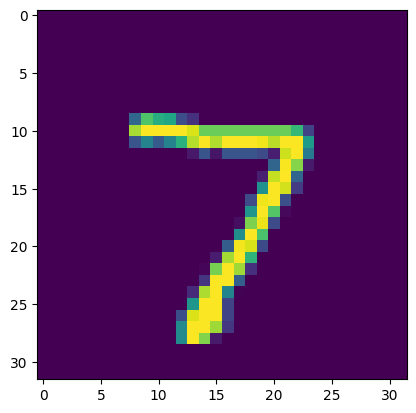

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Moving the model back to the CPU
model.to("cpu")

# parameters of the trained network
param = list(model.parameters())
for paramater in model.parameters():
  print(paramater.shape)


# Input image for analysis
# input_img = next(iter(test_loader))[0][0].squeeze(0)
input_img = next(iter(test_loader))[0][0].squeeze(0)
plt.imshow(input_img)
print('input Image shape',input_img.shape)
# Modifying the input image for analysis
input_img = input_img.unsqueeze(0).unsqueeze(0)
# savemat('input_img.mat', {'input_img':input_img})
# files.download('input_img.mat')

In [ ]:
from scipy.io import savemat, loadmat

[[[[0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   ...
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]
   [0. 0. 0. ... 0. 0. 0.]]]]
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(32, 32)


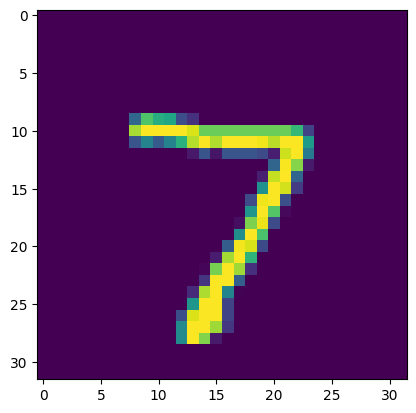

In [ ]:
temp_2 = input_img.detach().numpy()
print(temp_2)
print(temp_2.squeeze(0).squeeze(0))
input_image = temp_2.squeeze(0).squeeze(0)
print(input_image.shape)
plt.imshow(input_image)
# savemat('input_image.mat',{'input_image':input_image})
# download('input_image.mat')

In [ ]:
# input_img.shape
# tensor_image = torch.from_numpy(input_img)
# tensor_image = tensor_image.unsqueeze(0)
# tensor_image.shape
# input_img = tensor_image

# input_img = np.stack((input_img,) * 3, axis=-1)
# input_img.shape

In [ ]:
from scipy.io import loadmat, savemat
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# print(input_img.shape)
# input_img = np.concatenate((input_img,input_img, input_img), axis=1)
# print(input_img.shape)

torch.Size([1, 1, 32, 32])
(1, 3, 32, 32)


In [ ]:
# input_img = torch.tensor(input_img)
# print(input_img.shape)

torch.Size([1, 3, 32, 32])


In [ ]:
plt.figure(figsize=(10, 10))
row = 2
columns = 3
output_fm = []
for i in range(64):
    output_fm.append(model.conv1_B1.forward(input_img)[0][i].detach().numpy())
    # plt.subplot(6 / columns + 1, columns, i + 1)
    # plt.imshow(output_fm)
output_fm = np.asarray(output_fm)
print(output_fm.shape)

(64, 32, 32)


<Figure size 1000x1000 with 0 Axes>

plt.figure(figsize=(10, 10))
row = 2
columns = 3
for i in range(6):
    output_fm = model.block1.forward(input_img)[0][i].detach().numpy()
    plt.subplot(6 / columns + 1, columns, i + 1)
    plt.imshow(output_fm)

In [ ]:
from google.colab import files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
weights = []
bias = []
for i in range(64):
  # print("{}, Bias: {}\n".format(param[0][i].data, param[1][i]))
  # print("Min: {}, Max: {}\n".format(np.min(param[0][i].data.numpy()), np.max(param[0][i].data.numpy())))
  w = param[0][i].data.detach().numpy()
  print(w.shape)
  w = w.squeeze(0)
  print(w.shape)
  print(w)
  path = '/content/drive/MyDrive/quantization/VGG16/'
  name = 'W'+str(i)+'_L1'
  print(name)
  savemat(path+name+'.mat', {name:w})
  # files.download(name+'.mat')

(1, 3, 3)
(3, 3)
[[-0.81539285 -0.08265823 -0.16573203]
 [ 0.06766253  0.11360633 -0.30736014]
 [ 0.43845806  0.7509732   0.64448917]]
W0_L1
(1, 3, 3)
(3, 3)
[[-0.68416154 -0.77089065 -0.08622184]
 [-0.635584   -0.01775197 -0.26158273]
 [-0.11260072 -0.03906704 -0.20330596]]
W1_L1
(1, 3, 3)
(3, 3)
[[-0.44874611  0.6871077  -0.51841533]
 [-0.22866468 -0.64851075  0.33762714]
 [-0.6114203   0.7862055  -0.79565144]]
W2_L1
(1, 3, 3)
(3, 3)
[[ 0.49938217 -0.29148412  0.5582669 ]
 [-0.49159253 -0.44008723  0.7845872 ]
 [-0.04140428 -0.18642904 -0.01376448]]
W3_L1
(1, 3, 3)
(3, 3)
[[-0.52807367  0.14536892 -0.20335713]
 [-0.20968388 -0.20650992 -0.06613079]
 [-0.16660066  0.143516   -0.13316189]]
W4_L1
(1, 3, 3)
(3, 3)
[[-0.09246776  0.00924818 -0.48989362]
 [-0.2846686   0.30021378 -0.22346884]
 [-0.10699277 -0.27518716 -0.6950281 ]]
W5_L1
(1, 3, 3)
(3, 3)
[[-0.31176066 -0.17677948 -0.18918471]
 [-0.7768262   0.35729635  0.72983205]
 [ 0.53307056  0.74920934  0.5657065 ]]
W6_L1
(1, 3, 3)
(3,

In [ ]:
weights = []
bias = []
for i in range(64):
  # print("{}, Bias: {}\n".format(param[0][i].data, param[1][i]))
  # print("Min: {}, Max: {}\n".format(np.min(param[0][i].data.numpy()), np.max(param[0][i].data.numpy())))
  w = param[2][i].data.detach().numpy()
  print(w.shape)
  # w = w.squeeze(0)
  # print(w.shape)
  print(w)
  path = '/content/drive/MyDrive/quantization/ResNet18/'
  name = 'W'+str(i)+'_L2'
  print(name)
  savemat(path+name+'.mat', {name:w})
  # files.download(name+'.mat')

Streaming output truncated to the last 5000 lines.

 [[ 0.00421613 -0.11336403 -0.09671306]
  [ 0.0410454  -0.1003255  -0.08491208]
  [-0.07840312  0.00657995  0.04318019]]

 [[ 0.01883131  0.09173356  0.02185396]
  [-0.07231612 -0.08540924  0.09433028]
  [ 0.03464946 -0.09569877 -0.0041205 ]]

 [[ 0.05111558  0.07826199 -0.02922939]
  [-0.02365528 -0.05576903  0.06380916]
  [ 0.04325134  0.02486197  0.06305832]]

 [[ 0.04086365 -0.06303931  0.00942695]
  [-0.06709872 -0.00074144  0.01960729]
  [-0.06096151 -0.00558627 -0.08639335]]

 [[ 0.02273775  0.03371645 -0.06825911]
  [ 0.01607577  0.06219201  0.05779644]
  [-0.09696943 -0.07884165  0.03079919]]

 [[-0.03234595 -0.05328266  0.06983518]
  [ 0.05789399  0.10219494  0.0949922 ]
  [-0.03209547  0.08095959  0.04368299]]

 [[ 0.0218669  -0.01203764  0.08996628]
  [ 0.0229336  -0.0078341   0.03782909]
  [-0.05165305  0.08607424  0.09987095]]

 [[ 0.00115009  0.08546178 -0.03033362]
  [ 0.07027126 -0.05125222 -0.0523726 ]
  [ 0.06018005